# Model to predict whether or not a customer will Churn

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [4]:
df.sample(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
3489  4988-IQIGL    Male              1      No         No       1   
3994  7446-KQISO    Male              0     Yes        Yes      45   
3397  9618-LFJRU  Female              0      No         No       4   
49    2954-PIBKO  Female              0     Yes        Yes      69   
2640  8562-GHPPI  Female              0      No         No       1   
5417  8630-QSGXK    Male              0     Yes         No      51   
2851  2740-TVLFN    Male              0      No         No       1   
3018  0238-WHBIQ    Male              0     Yes        Yes      72   
6989  0052-YNYOT  Female              0      No         No      67   
5163  3566-VVORZ  Female              0     Yes         No      12   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
3489          Yes           Yes     Fiber optic                   No  ...   
3994          Yes           Yes     Fiber optic                   No  ...   
3397          Yes            No              No  No internet service  ...   
49            Yes           Yes             DSL                  Yes  ...   
2640          Yes            No              No  No internet service  ...   
5417          Yes           Yes             DSL                   No  ...   
2851          Yes           Yes             DSL                   No  ...   
3018          Yes           Yes             DSL                  Yes  ...   
6989          Yes            No              No  No internet service  ...   
5163          Yes            No             DSL                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
3489                   No                   No                   No   
3994                  Yes                  Yes                  Yes   
3397  No internet service  No internet service  No internet service   
49                    Yes                  Yes                   No   
2640  No internet service  No internet service  No internet service   
5417                   No                  Yes                  Yes   
2851                   No                   No                   No   
3018                  Yes                  Yes                  Yes   
6989  No internet service  No internet service  No internet service   
5163                   No                   No                   No   

          StreamingMovies        Contract PaperlessBilling  \
3489                   No  Month-to-month              Yes   
3994                  Yes        Two year              Yes   
3397  No internet service  Month-to-month               No   
49                     No        Two year              Yes   
2640  No internet service  Month-to-month               No   
5417                  Yes        Two year              Yes   
2851                   No  Month-to-month              Yes   
3018                  Yes        Two year               No   
6989  No internet service        One year               No   
5163                   No  Month-to-month               No   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
3489           Electronic check          75.35         75.35    Yes  
3994  Bank transfer (automatic)         109.75       4900.65     No  
3397    Credit card (automatic)          20.45         82.85     No  
49      Credit card (automatic)          64.15       4254.10     No  
2640    Credit card (automatic)          19.80         19.80     No  
5417  Bank transfer (automatic)          75.20       3901.25     No  
2851           Electronic check          50.15         50.15     No  
3018    Credit card (automatic)          89.70       6339.30     No  
6989           Electronic check          20.55       1343.40     No  
5163  Bank transfer (automatic)          45.90        505.95     No  

[10 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [8]:
df.describe().transpose()

count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

# Exploratory Data Analysis (EDA)

In [9]:
# Checking if the column has null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

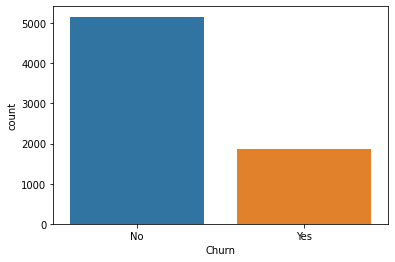

In [10]:
# Checking the label balance
sns.countplot(data=df,x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

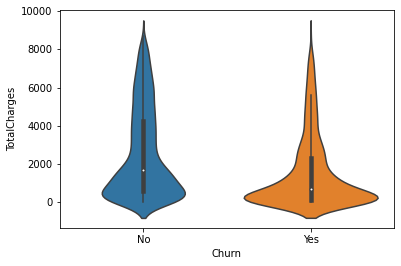

In [12]:
sns.violinplot(data=df, x='Churn',y='TotalCharges')

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

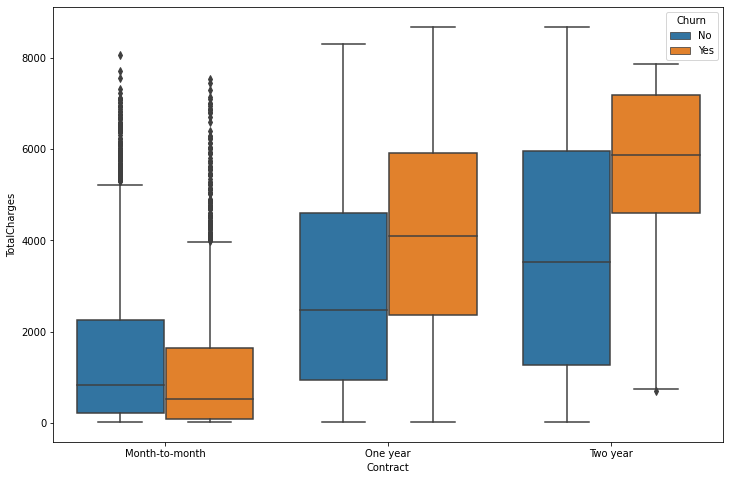

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')

In [14]:
#Creating bar plot for showing the correlation of the :
# 'gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
#'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
#'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

corr_df['Churn_Yes'].sort_values(ascending=True)[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

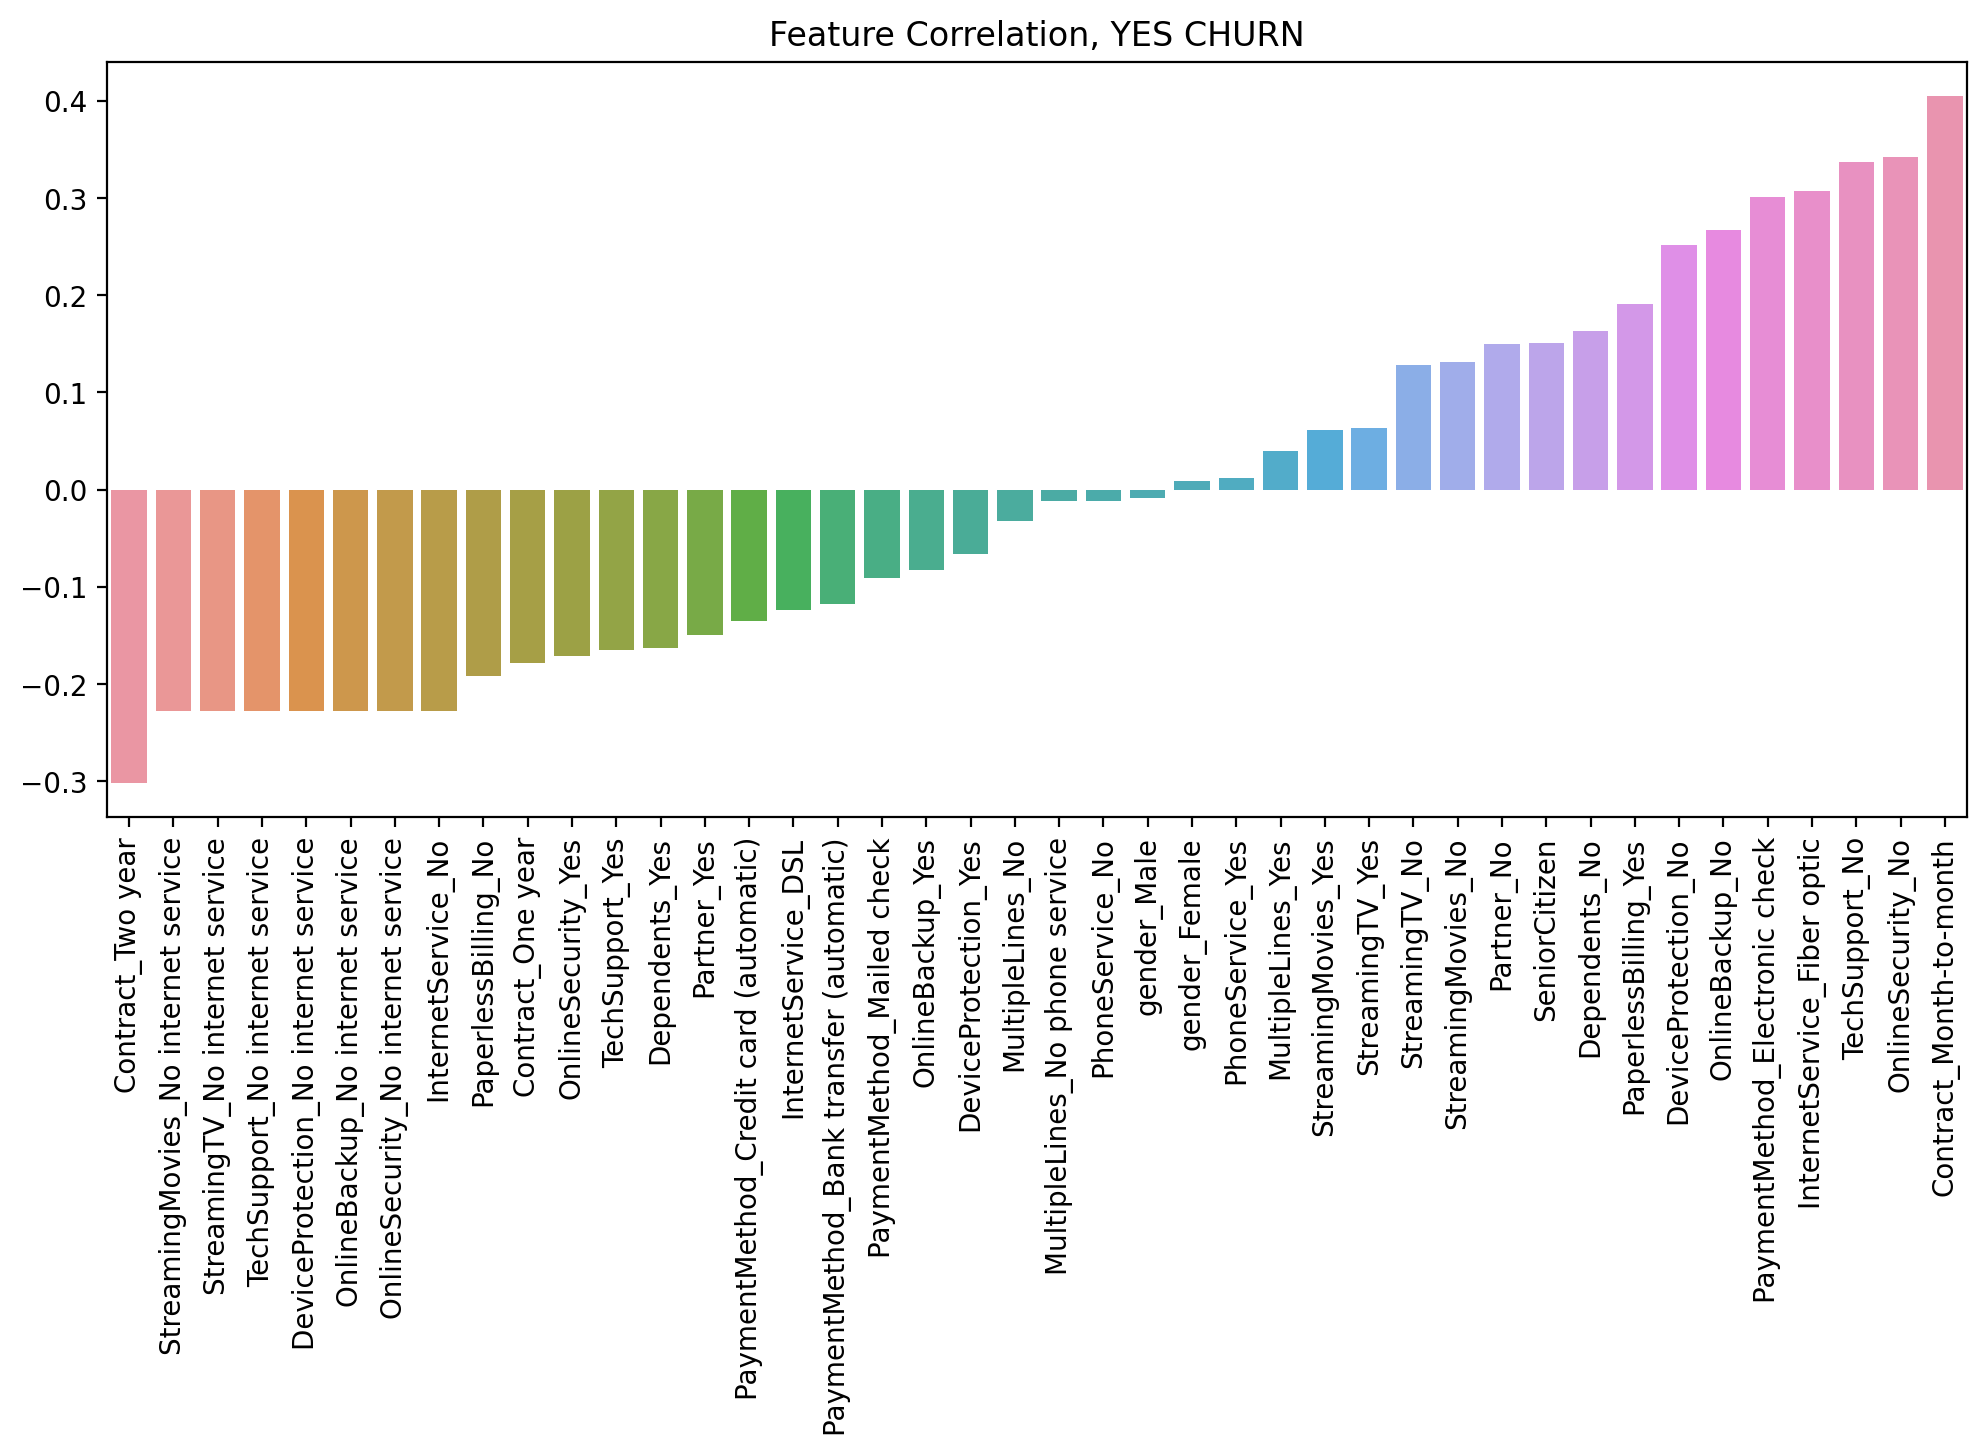

In [17]:
plt.figure(figsize=(12,5),dpi=200)
plt.title("Feature Correlation, YES CHURN")
sns.barplot(x=corr_df['Churn_Yes'].sort_values(ascending=True)[1:-1].index, y=corr_df['Churn_Yes'].sort_values(ascending=True)[1:-1].values)
plt.xticks(rotation=90);

In [18]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Create a histogram displaying the distribution of 'tenure' column, for get the information the amount of months a customer was or has been on a customer

<AxesSubplot:xlabel='tenure', ylabel='Count'>

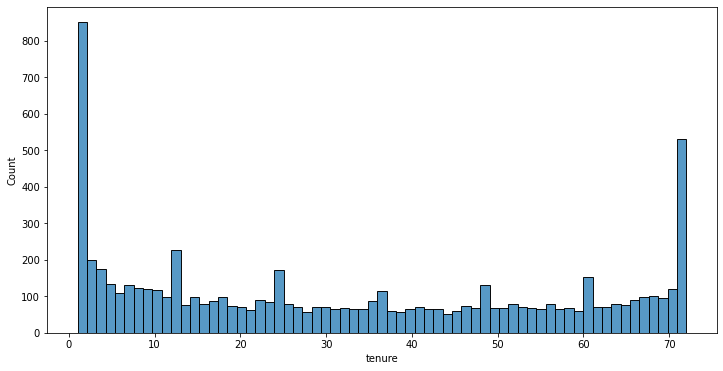

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='tenure',bins=65)

<Figure size 2400x1200 with 0 Axes>

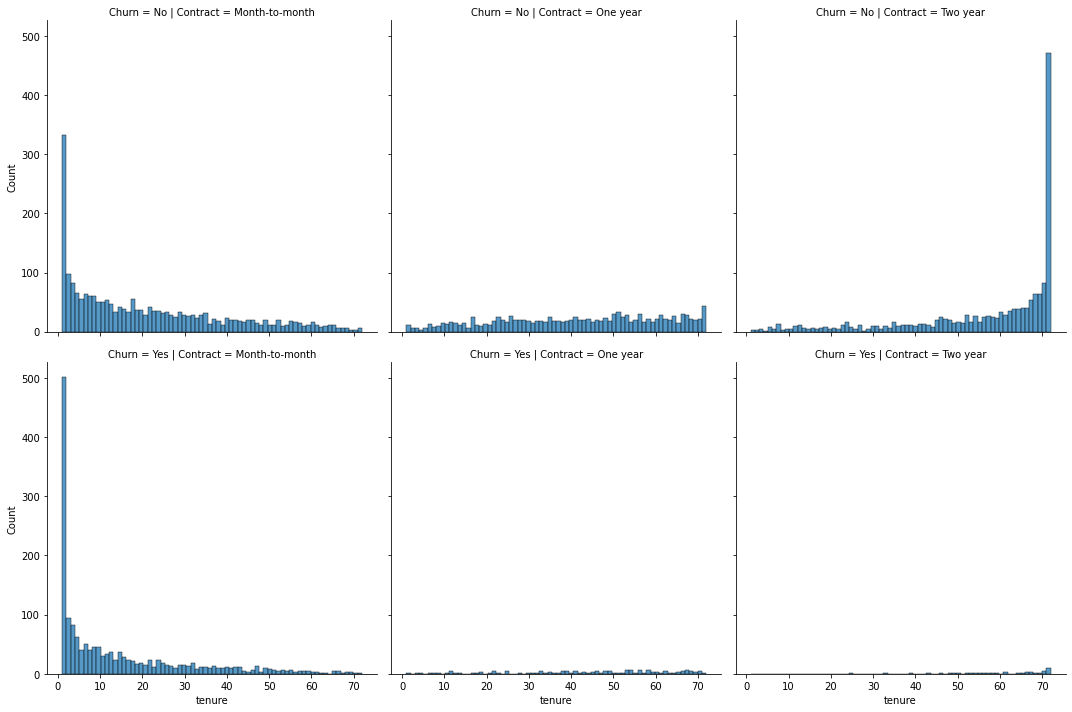

In [21]:
plt.figure(figsize=(12,6),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

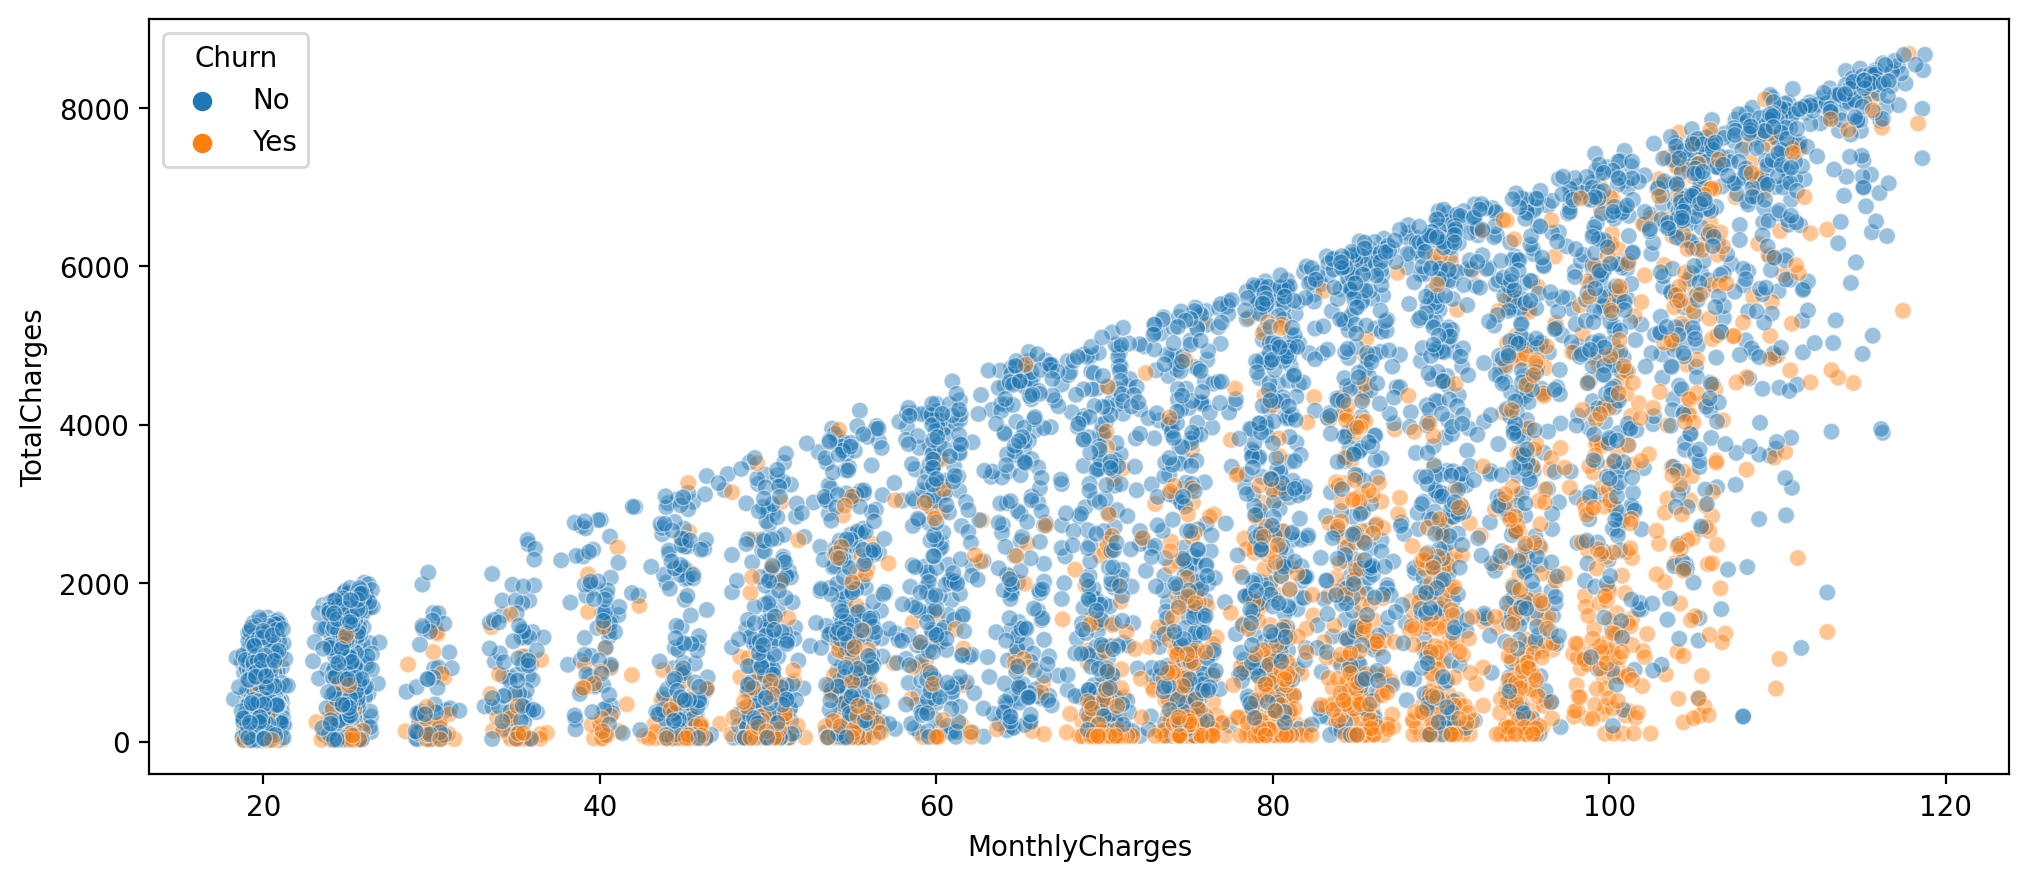

In [26]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.45)

In [27]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

In [28]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
yes_churn

tenure             1    2   3   4   5   6   7   8   9   10  ...  63  64  65  \
customerID        380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
gender            380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
SeniorCitizen     380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
Partner           380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
Dependents        380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
PhoneService      380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
MultipleLines     380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
InternetService   380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
OnlineSecurity    380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
OnlineBackup      380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
DeviceProtection  380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
TechSupport       380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
StreamingTV       380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
StreamingMovies   380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
Contract          380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
PaperlessBilling  380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
PaymentMethod     380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
MonthlyCharges    380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
TotalCharges      380  123  94  83  64  40  51  42  46  45  ...   4   4   9   

tenure            66  67  68  69  70  71  72  
customerID        13  10   9   8  11   6   6  
gender            13  10   9   8  11   6   6  
SeniorCitizen     13  10   9   8  11   6   6  
Partner           13  10   9   8  11   6   6  
Dependents        13  10   9   8  11   6   6  
PhoneService      13  10   9   8  11   6   6  
MultipleLines     13  10   9   8  11   6   6  
InternetService   13  10   9   8  11   6   6  
OnlineSecurity    13  10   9   8  11   6   6  
OnlineBackup      13  10   9   8  11   6   6  
DeviceProtection  13  10   9   8  11   6   6  
TechSupport       13  10   9   8  11   6   6  
StreamingTV       13  10   9   8  11   6   6  
StreamingMovies   13  10   9   8  11   6   6  
Contract          13  10   9   8  11   6   6  
PaperlessBilling  13  10   9   8  11   6   6  
PaymentMethod     13  10   9   8  11   6   6  
MonthlyCharges    13  10   9   8  11   6   6  
TotalCharges      13  10   9   8  11   6   6  

[19 rows x 72 columns]

In [31]:
churn_rate = 100 * yes_churn / (yes_churn+no_churn)
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

Text(0, 0.5, 'Churn Percentage')

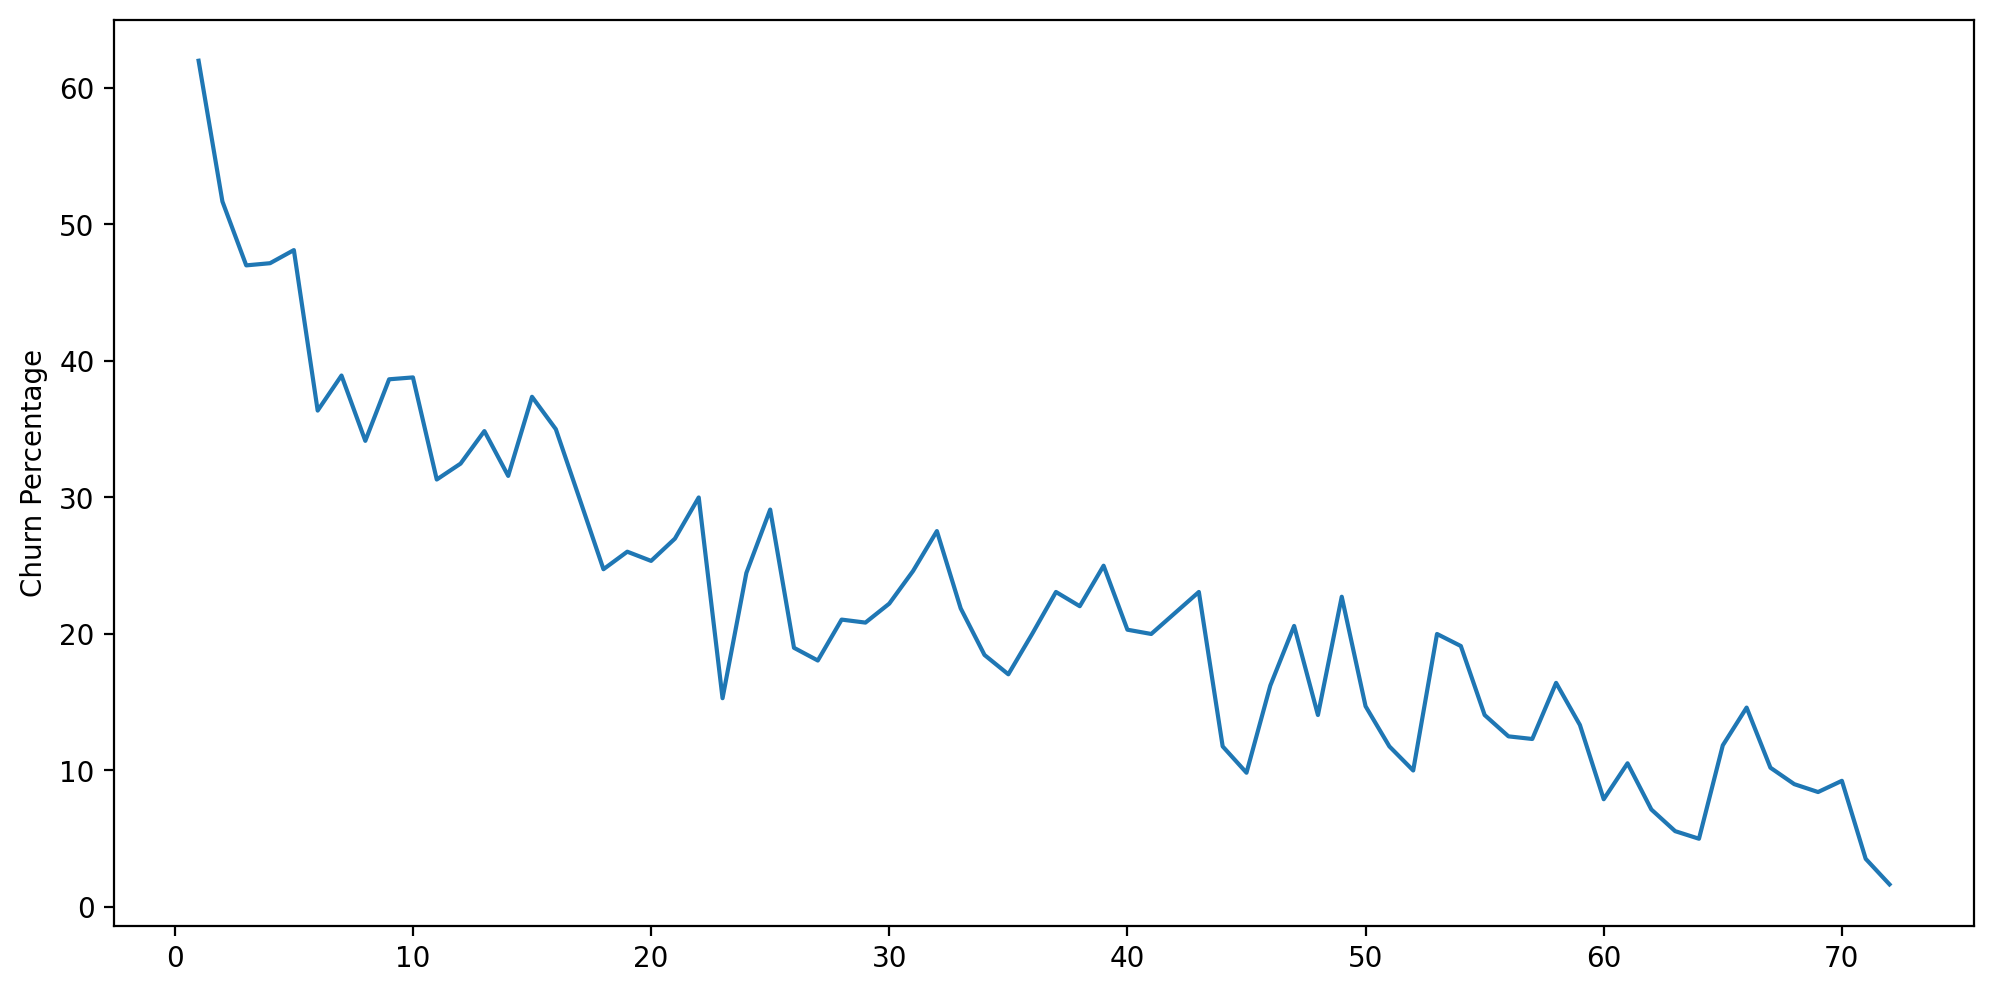

In [33]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(churn_rate.transpose()['customerID'])
plt.ylabel("Churn Percentage")

In [34]:
def convert(x):
    if x >= 0 and x<=12:
        return '0-12 Months'
    elif x>11 and x<25:
        return '12-24 Months'
    elif x>23 and x<49:
        return '24-48 Months'
    return 'Over 48 Months'

df['Tenure Cohort'] = df['tenure'].apply(convert)
df[['tenure','Tenure Cohort']].head(10)

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

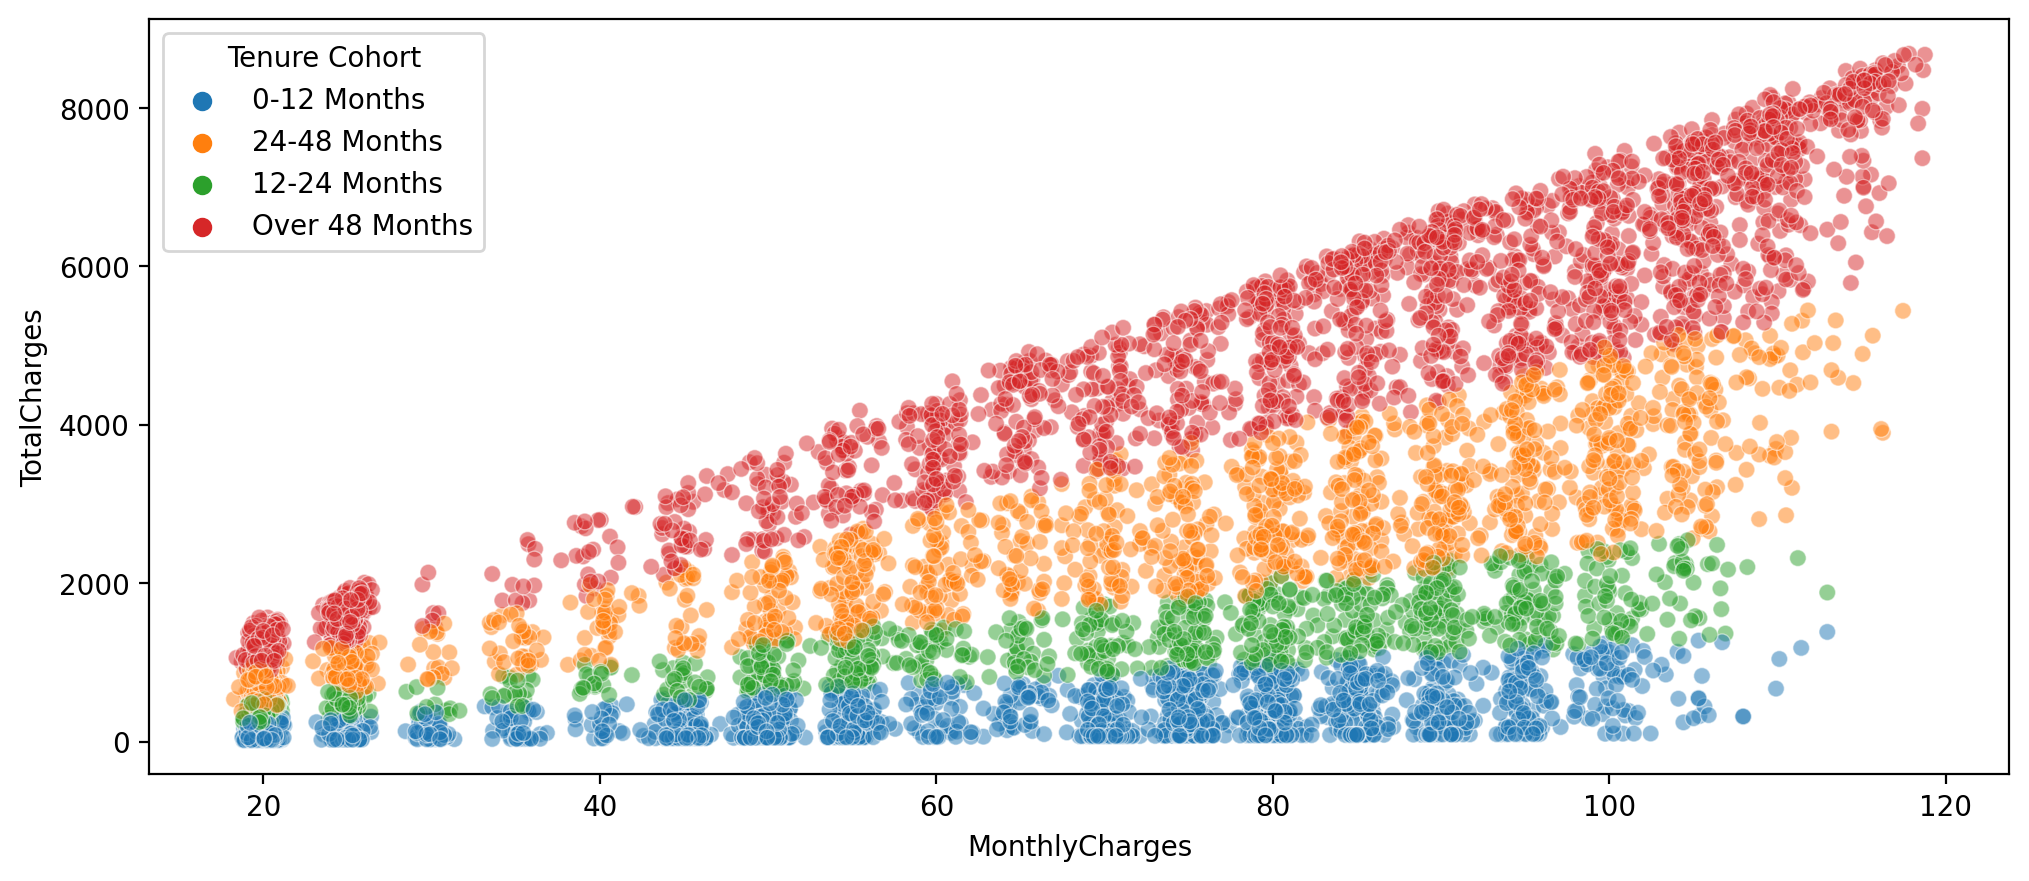

In [35]:
# Ploting MonthlyCharges distribution from TotalCharges
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', alpha=0.5)

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

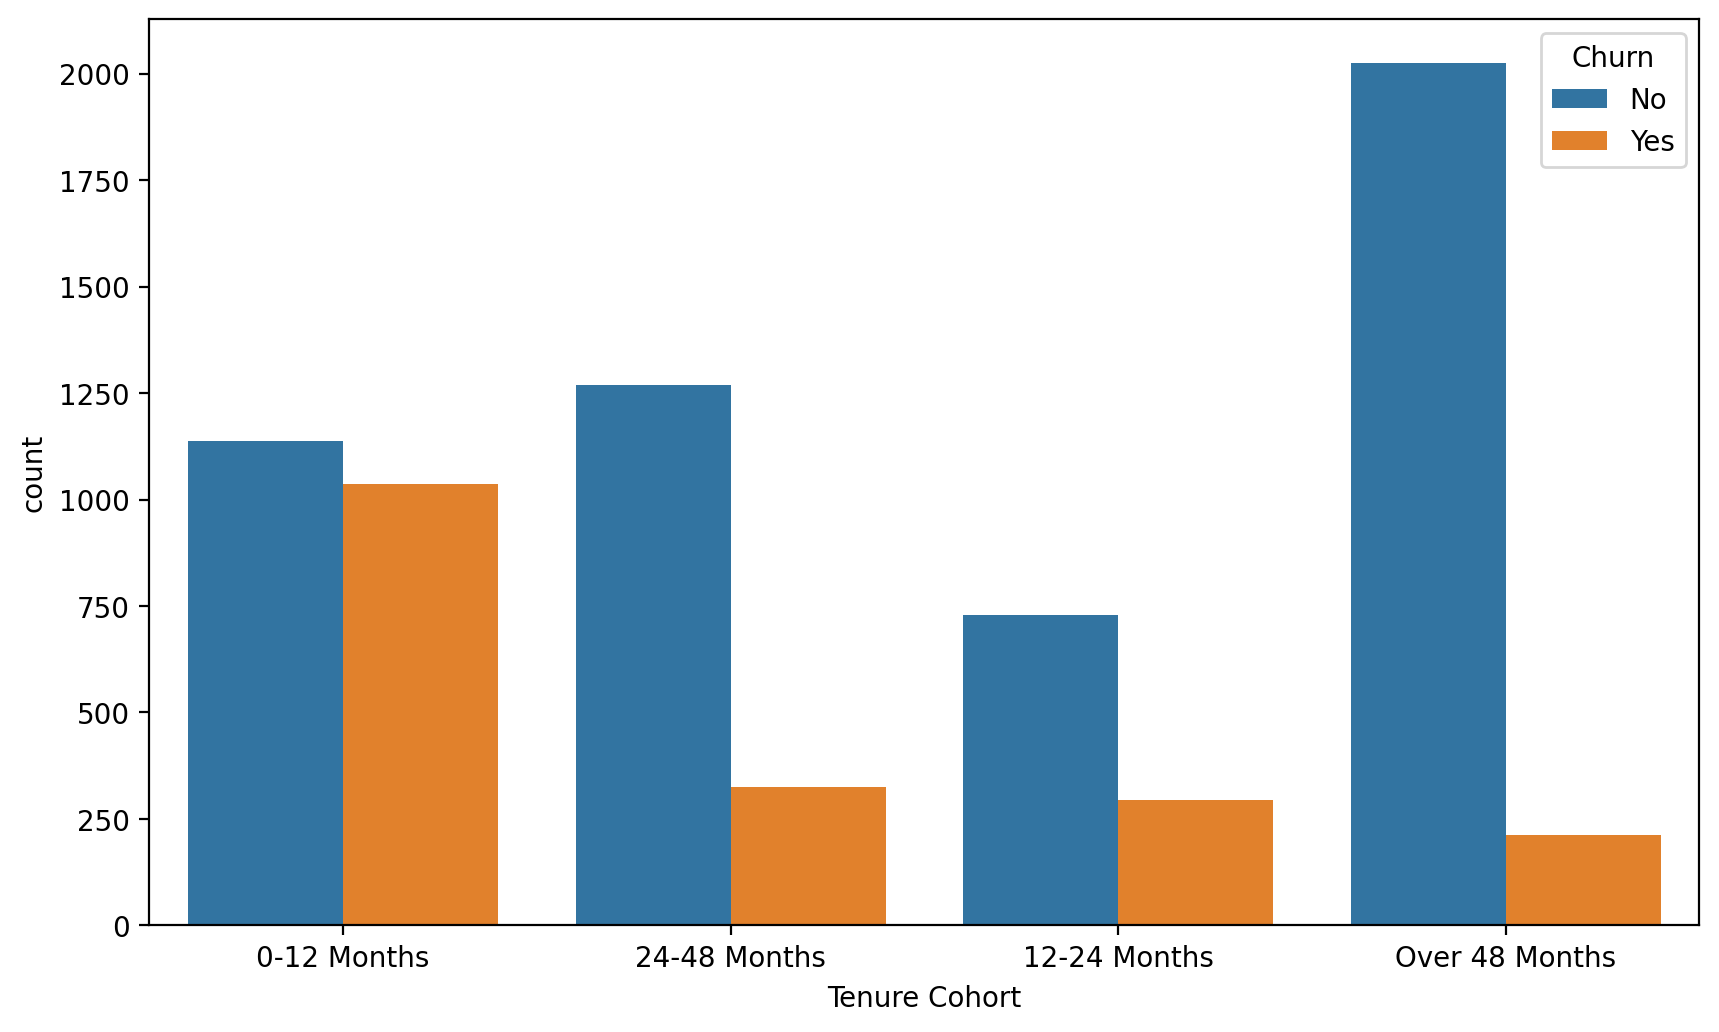

In [36]:
plt.figure(figsize=(10,6),dpi=200)
sns.countplot(data=df, x='Tenure Cohort',hue='Churn')

<Figure size 2400x1600 with 0 Axes>

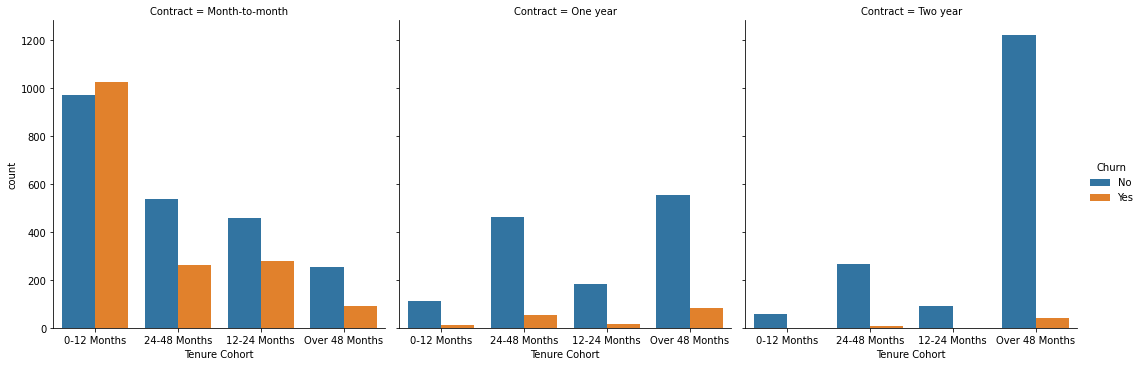

In [40]:
plt.figure(figsize=(12,8),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

# Machine Learning Model

In [41]:
# Define Feature and Label
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

In [42]:
# Training Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [43]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [46]:
# Evaluating the Performance
# Import the needed library
from sklearn.metrics import plot_confusion_matrix, classification_report

### **Decision Tree Without Tuning Hyper Parameter** ##

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(scaled_X_train,y_train)
y_pred = dtc.predict(scaled_X_test)

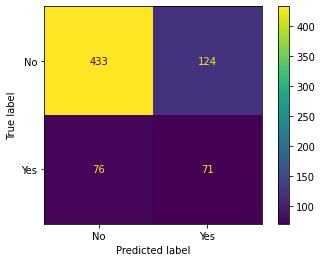

In [52]:
plot_confusion_matrix(dtc,scaled_X_test,y_test)

In [53]:
print("Decision Tree without Tuning Hyper Parameter")
print(classification_report(y_test,y_pred))

Decision Tree without Tuning Hyper Parameter
              precision    recall  f1-score   support

          No       0.85      0.78      0.81       557
         Yes       0.36      0.48      0.42       147

    accuracy                           0.72       704
   macro avg       0.61      0.63      0.61       704
weighted avg       0.75      0.72      0.73       704



In [54]:
# Ploting the Feature Importance
feat_imp = dtc.feature_importances_
feature_imp = pd.DataFrame(index=X.columns, data=feat_imp, columns=['Feature Importance'])
feature_imp = feature_imp.reset_index()
feature_imp = feature_imp.sort_values('Feature Importance')
feature_imp

index  Feature Importance
16   DeviceProtection_No internet service            0.000000
22    StreamingMovies_No internet service            0.000000
20        StreamingTV_No internet service            0.000000
18        TechSupport_No internet service            0.000000
14       OnlineBackup_No internet service            0.000000
32           Tenure Cohort_Over 48 Months            0.000245
11                     InternetService_No            0.000353
8          MultipleLines_No phone service            0.000709
30             Tenure Cohort_12-24 Months            0.001337
31             Tenure Cohort_24-48 Months            0.001676
7                        PhoneService_Yes            0.003729
21                        StreamingTV_Yes            0.007818
23                    StreamingMovies_Yes            0.008672
12     OnlineSecurity_No internet service            0.009096
25                      Contract_Two year            0.010450
17                   DeviceProtection_Yes            0.010458
29             PaymentMethod_Mailed check            0.012882
6                          Dependents_Yes            0.014947
27  PaymentMethod_Credit card (automatic)            0.015343
19                        TechSupport_Yes            0.015531
24                      Contract_One year            0.015725
4                             gender_Male            0.016697
15                       OnlineBackup_Yes            0.017630
9                       MultipleLines_Yes            0.018231
0                           SeniorCitizen            0.019796
28         PaymentMethod_Electronic check            0.021514
13                     OnlineSecurity_Yes            0.022058
26                   PaperlessBilling_Yes            0.022158
5                             Partner_Yes            0.022217
10            InternetService_Fiber optic            0.108663
3                            TotalCharges            0.192315
1                                  tenure            0.203492
2                          MonthlyCharges            0.206260

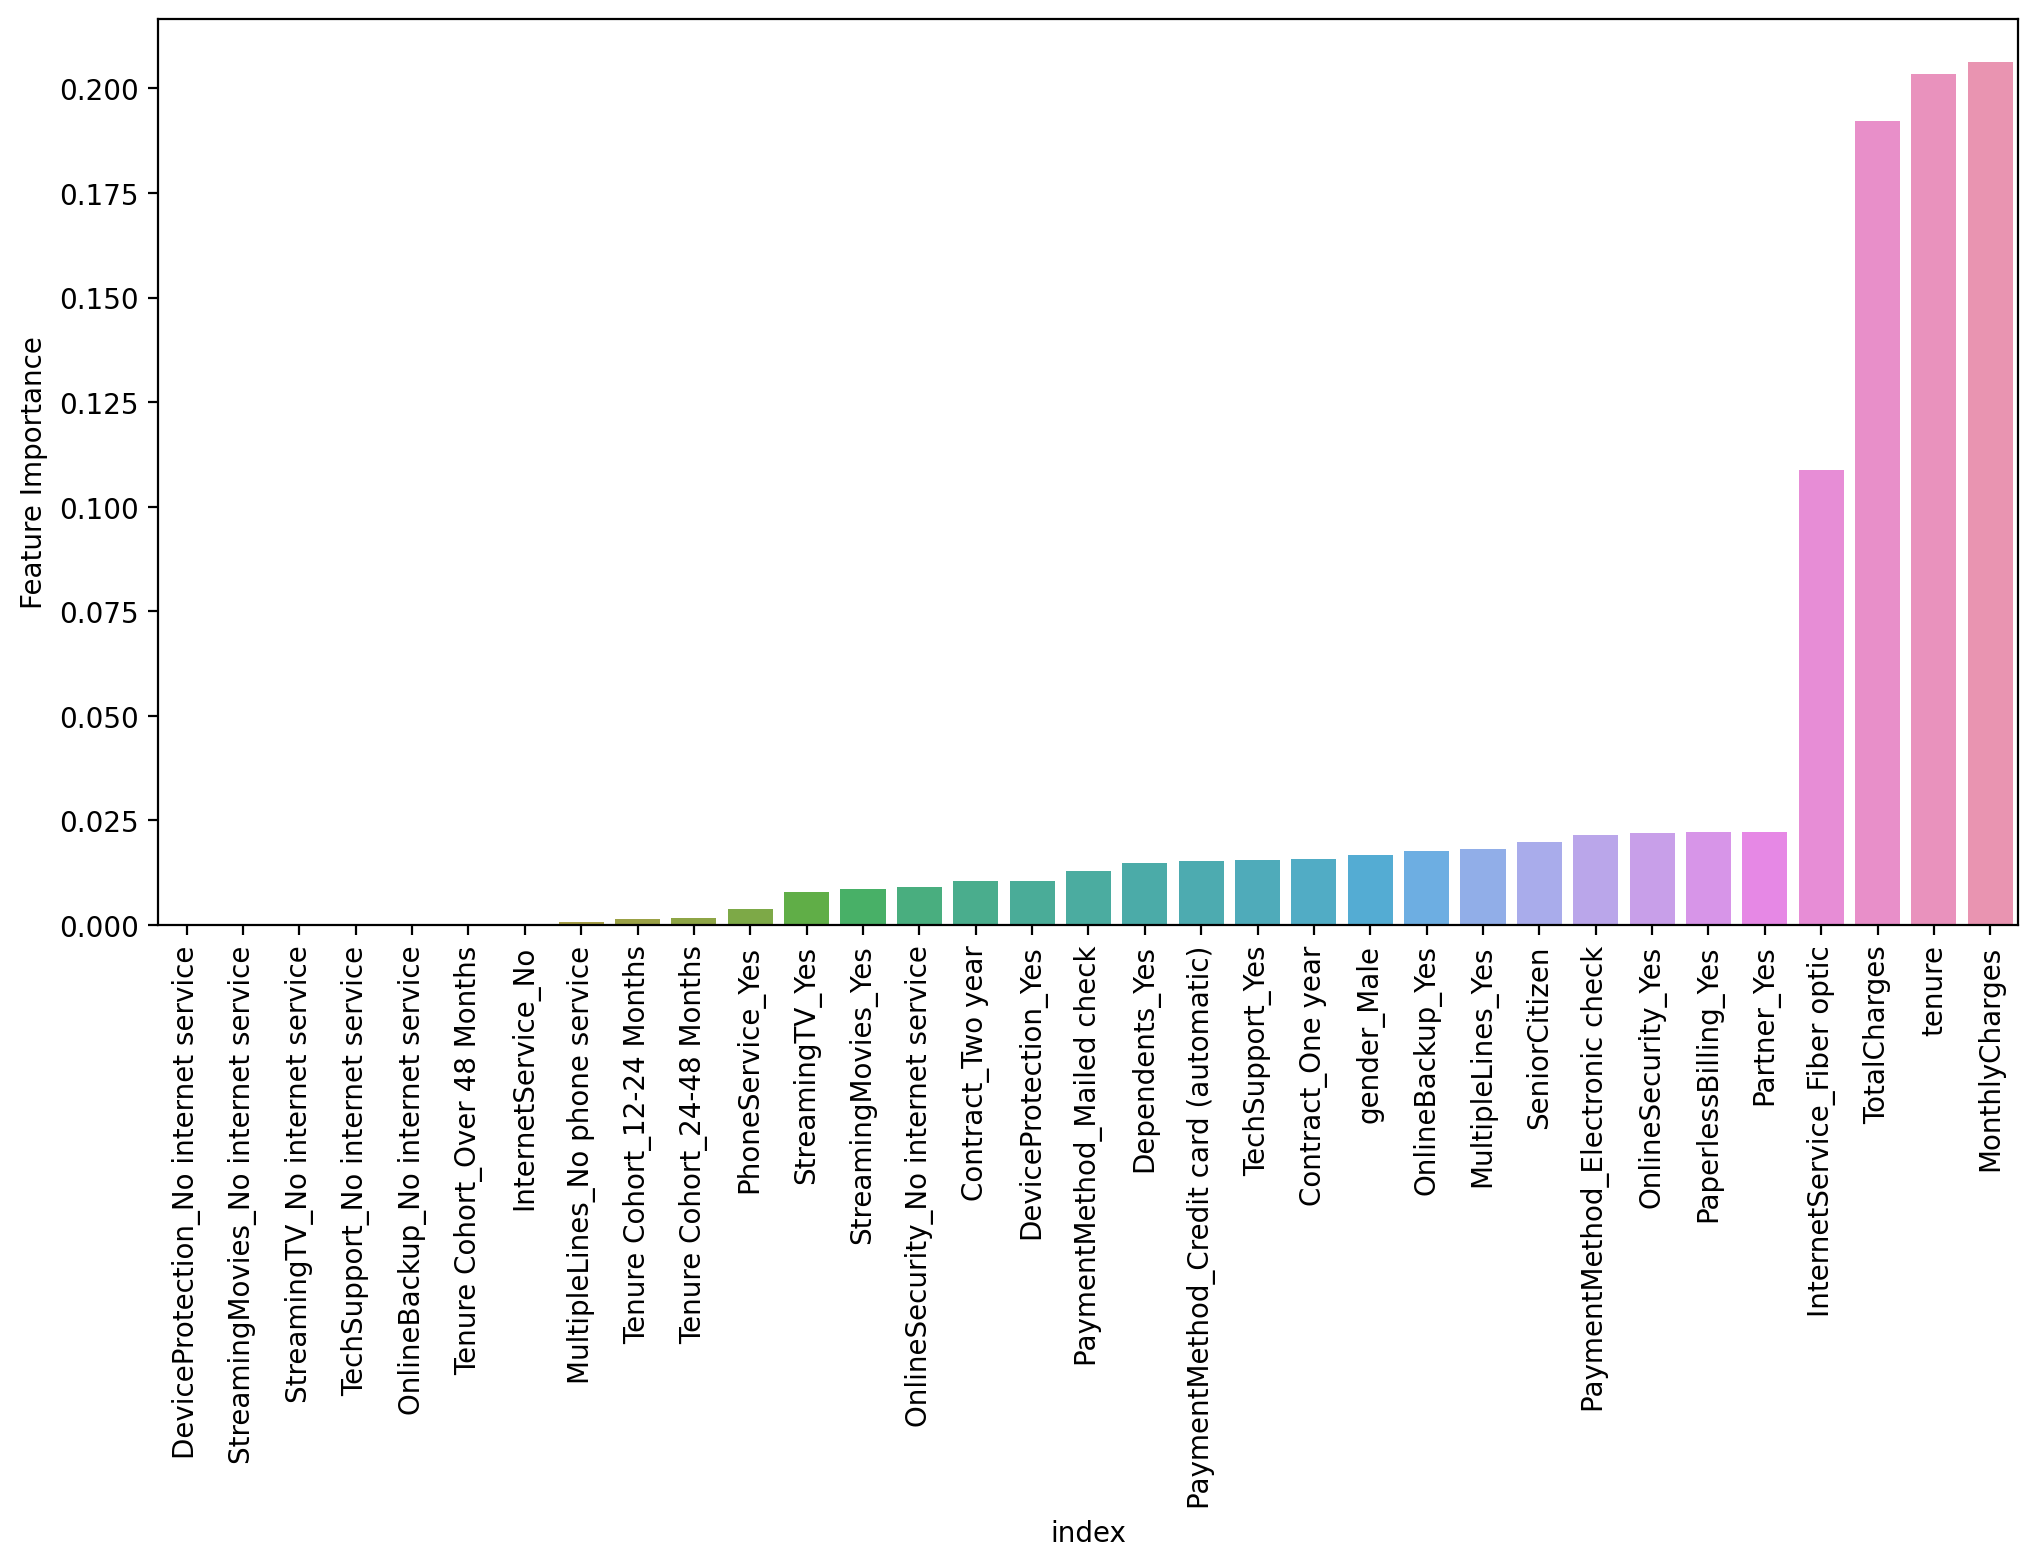

In [55]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=feature_imp['index'],y=feature_imp['Feature Importance'])
plt.xticks(rotation=90);

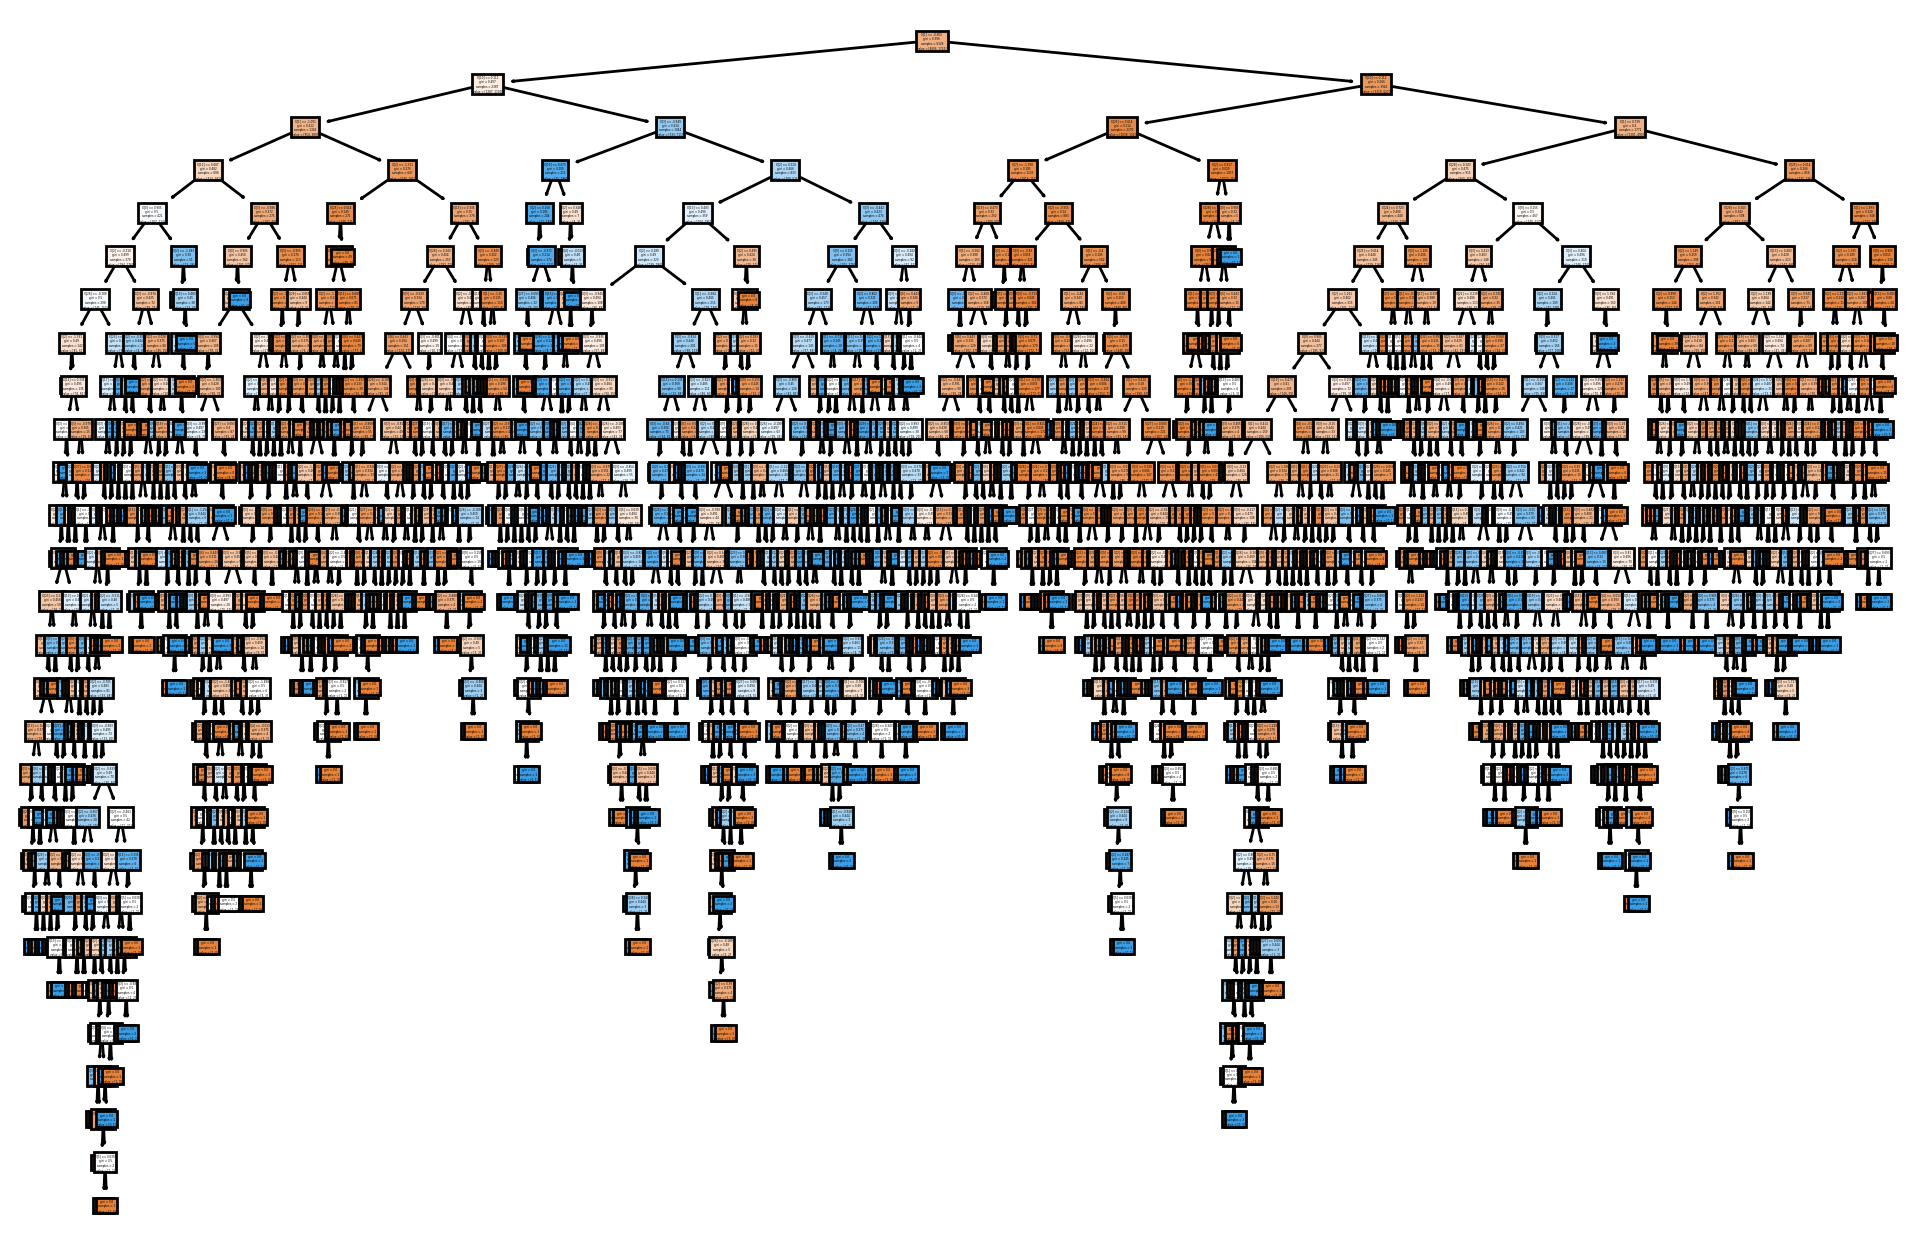

In [57]:
# Ploting the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=200)
plot_tree(dtc, filled=True);

In [59]:
dtc.get_depth()

27

### **Random Forest Without Tuning Hyper Parameter** ##

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(scaled_X_train,y_train)
y_pred_2 = rfc.predict(scaled_X_test)

Random Forest without Tuning Hyper Parameter
              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.53      0.48      0.50       147

    accuracy                           0.80       704
   macro avg       0.70      0.68      0.69       704
weighted avg       0.80      0.80      0.80       704



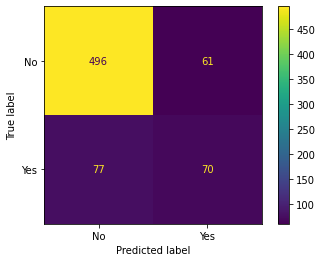

In [76]:
plot_confusion_matrix(rfc,scaled_X_test,y_test)
print("Random Forest without Tuning Hyper Parameter")
print(classification_report(y_test,y_pred_2))

### **KNN Without Tuning Hyper Parameter** ##

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(scaled_X_train,y_train)
y_pred_3 = knn.predict(scaled_X_test)

KNN without Tuning Hyper Parameter
              precision    recall  f1-score   support

          No       0.87      0.86      0.86       557
         Yes       0.49      0.52      0.50       147

    accuracy                           0.79       704
   macro avg       0.68      0.69      0.68       704
weighted avg       0.79      0.79      0.79       704



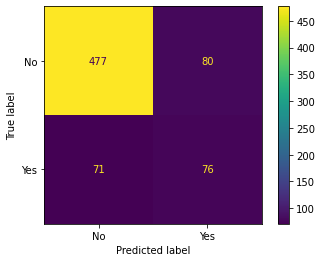

In [77]:
plot_confusion_matrix(knn,scaled_X_test,y_test)
print("KNN without Tuning Hyper Parameter")
print(classification_report(y_test,y_pred_3))

### **SVC Tree Without Tuning Hyper Parameter** ##

In [68]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(scaled_X_train,y_train)
y_pred_4 = svc.predict(scaled_X_test)

SVC without Tuning Hyper Parameter
              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.60      0.46      0.52       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.71       704
weighted avg       0.81      0.82      0.81       704



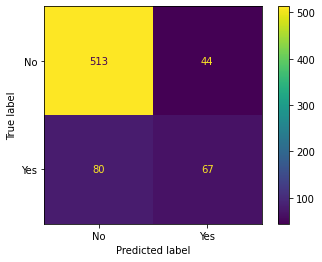

In [84]:
plot_confusion_matrix(svc,scaled_X_test,y_test)
print("SVC without Tuning Hyper Parameter")
print(classification_report(y_test,y_pred_4))

### **Logistic Regression without Tuning Hyper Parameter** ##

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(scaled_X_train,y_train)
y_pred_5 = lr.predict(scaled_X_test)

Logistic Regression without Tuning Hyper Parameter
              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.52      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.82       704



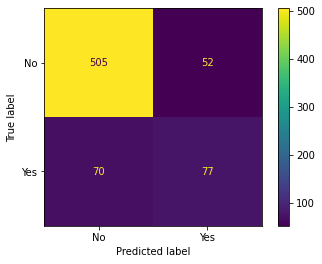

In [74]:
plot_confusion_matrix(lr,scaled_X_test,y_test)
print("Logistic Regression without Tuning Hyper Parameter")
print(classification_report(y_test,y_pred_5))

### **AdaBoost and GradienBoost Without Tuning Hyper Parameter** ##

In [79]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
abc.fit(scaled_X_train,y_train)
gbc.fit(scaled_X_train,y_train)
y_pred_6 = abc.predict(scaled_X_test)
y_pred_7 = gbc.predict(scaled_X_test)

AdaBoost without Tuning Hyper Parameter
              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



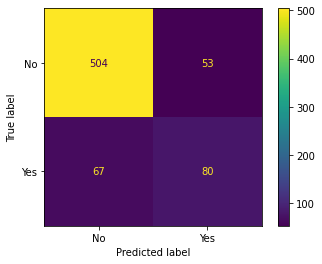

In [82]:
plot_confusion_matrix(abc,scaled_X_test,y_test)
print("AdaBoost without Tuning Hyper Parameter")
print(classification_report(y_test,y_pred_6))

GradienBoost without Tuning Hyper Parameter
              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



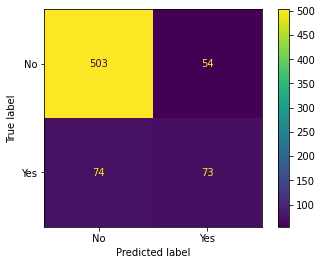

In [83]:
plot_confusion_matrix(gbc,scaled_X_test,y_test)
print("GradienBoost without Tuning Hyper Parameter")
print(classification_report(y_test,y_pred_7))

### Conclusion ###

From the model above, we can conclude, the best model is AdaBoost and Logistic Regression, but we didn't do any gridsearching. The result above, most model performed same on the data set.